In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

font = {"family": "sans-serif", "weight": "normal", "size": 13}

matplotlib.rc("font", **font)

In [8]:
bigearthnet = [
    ("MoCO - BigEarthNet (MSI)", 0.0552),
    ("MoCO - BigEarthNet (RGB)", 0.0417),
    ("ImageNet - BigEarthNet (MSI)", -0.0070),
    ("ImageNet - BigEarthNet (RGB)", -0.0146),
    ("Random init. - BigEarthNet (MSI)", 0.0408),
    ("Random init. - BigEarthNet (RGB)", 0.0339),
    ("MOSAIKS - BigEarthNet (MSI)", 0.0005),
    ("MOSAIKS - BigEarthNet (RGB)", 0.0002),
]

eurosat = [
    ("MoCo - EuroSAT", 0.9385 - 0.8283),
    ("ImageNet - EuroSAT", 0.6293 - 0.6467),
    ("Random init. - EuroSAT", 0.8237 - 0.6743),
    ("MOSAIKS - EuroSAT", 0.8333 - 0.8339),
]

treesatai = [
    ("MoCo - TreeSatAI (MSI)", 0.0801),
    ("MoCo - TreeSatAI (RGB)", 0.0759),
    ("ImageNet - TreeSatAI (MSI)", 0.0508),
    ("ImageNet - TreeSatAI (RGB)", 0.0403),
    ("Random init. - TreeSatAI (MSI)", 0.0964),
    ("Random init. - TreeSatAI (RGB)", 0.0427),
    ("MOSAIKS - TreeSatAI (MSI)", 0.0067),
    ("MOSAIKS - TreeSatAI (RGB)", -0.0084),
]

sat6 = [
    ("MoCo - SAT-6 (RGB)", 0.9990 - 0.9817),
    ("ImageNet - SAT-6 (RGB)", 0.9977 - 0.9817),
    ("Random init. - SAT-6 (RGB)", 0.9857 - 0.9207),
    ("MOSAIKS - SAT-6 (RGB)", 0.9846 - 0.9862),
]

so2sat = [
    ("MoCo - So2Sat (MSI)", 0.2360),
    ("MoCo - So2Sat (RGB)", 0.1886),
    ("ImageNet - So2Sat (MSI)", 0.0706),
    ("ImageNet - So2Sat (RGB)", 0.1190),
    ("Random init. - So2Sat (MSI)", 0.2420),
    ("Random init. - So2Sat (RGB)", 0.2136),
    ("MOSAIKS - So2Sat (MSI)", 0.0044),
    ("MOSAIKS - So2Sat (RGB)", 0.0121),
]

deltas = bigearthnet + eurosat + treesatai + sat6 + so2sat

methods = [d[0] for d in deltas]
deltas = [d[1] * 100 for d in deltas]
data = dict(method=methods, delta=deltas)
df = pd.DataFrame(data)
df = df.sort_values("delta", ascending=True).reset_index()
df

,index,method,delta
0,9,ImageNet - EuroSAT,-1.74
1,3,ImageNet - BigEarthNet (RGB),-1.46
2,19,MOSAIKS - TreeSatAI (RGB),-0.84
3,2,ImageNet - BigEarthNet (MSI),-0.70
4,23,MOSAIKS - SAT-6 (RGB),-0.16
5,11,MOSAIKS - EuroSAT,-0.06
6,7,MOSAIKS - BigEarthNet (RGB),0.02
7,6,MOSAIKS - BigEarthNet (MSI),0.05
8,30,MOSAIKS - So2Sat (MSI),0.44
9,18,MOSAIKS - TreeSatAI (MSI),0.67


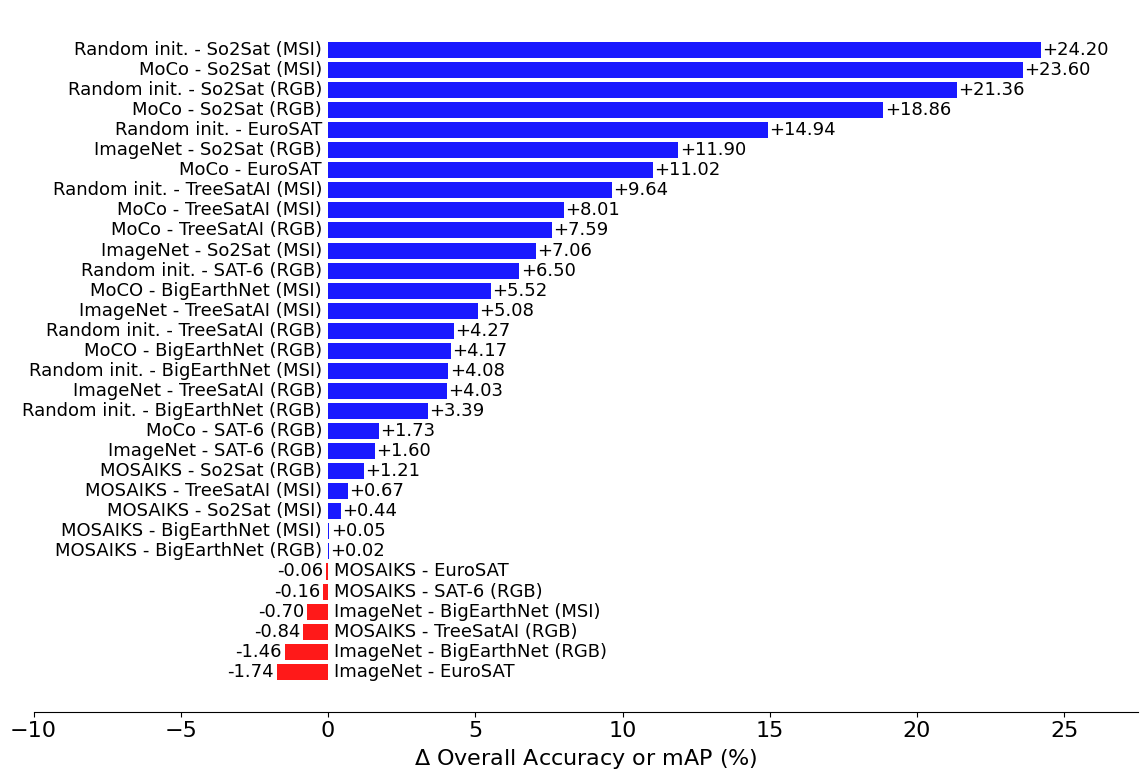

In [10]:
colors = ["blue" if x >= 0 else "red" for x in df["delta"]]
plt.figure(figsize=(12, 8))
ax = plt.barh(
    y=np.arange(len(df)),
    width=df.delta,
    color=colors,
    alpha=0.9,
    #edgecolor="k",
    linewidth=1,
)
plt.xlim([-10, 27.5])
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25], fontsize=16)
plt.yticks([],[])
plt.xlabel(r"$\Delta$ Overall Accuracy or mAP (%)", fontsize=16)
for rect, method, delta in zip(ax.patches, df["method"], df["delta"]):
    height = rect.get_y() + rect.get_height() / 2
    width = rect.get_width()
    delta_str = (
        r"+{:.2f}".format(np.abs(delta))
        if delta >= 0
        else r"-{:.2f}".format(np.abs(delta))
    )
    delta_x = width + 0.05 if delta >= 0 else width - 0.1
    color = "black" if delta >= 0 else "black"
    ha = "left" if delta >= 0 else "right"
    plt.text(delta_x, height, delta_str, ha=ha, va="center", color=color)
    ha = "right" if delta >= 0 else "left"
    method_x = 0.2 if delta < 0 else -0.2
    method_height = rect.get_y() + rect.get_height() / 2
    plt.text(method_x, height, method, ha=ha, va="center")
ax = plt.gca()
ax.spines[["left", "right", "top"]].set_visible(False)
ax.yaxis.set_tick_params(labelleft=False)
plt.tight_layout()